# Wine Reviews dataset from Kaggle
https://www.kaggle.com/zynicide/wine-reviews

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1 = pd.read_csv('winemag-data_first150k.csv')
data2 = pd.read_csv('winemag-data-130k-v2.csv')

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

In [3]:
df1.index = df1['Unnamed: 0']
df1 = df1.drop('Unnamed: 0', axis=1)
display(df1.head())

df2.index = df2['Unnamed: 0']
df2 = df2.drop('Unnamed: 0', axis=1)
display(df2.head())

,country,description,designation,points,price,province,region_1,region_2,variety,winery
Unnamed: 0,,,,,,,,,,
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
Unnamed: 0,,,,,,,,,,,,,
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
display(df1.isnull().sum())
display(df2.isnull().sum())

country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

C:\Users\dnly\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


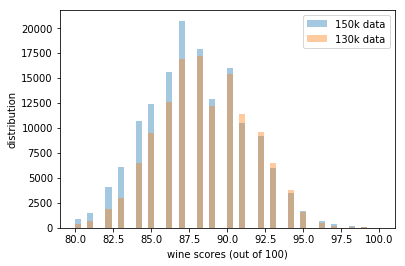

In [5]:
plt.figure()
sns.distplot(df1['points'], kde=False, label='150k data')
sns.distplot(df2['points'], kde=False, label='130k data')
plt.legend()
plt.xlabel('wine scores (out of 100)')
plt.ylabel('distribution')
plt.show()

In [6]:
def pd_summary_stats(df, *argv):
    
    # This function is used to display a dataframe containing basic summary stats (min, average, max, std)
    # for a given column(s) from a dataframe
    
    index = ['min', 'mean', 'max', 'std']
    df_summary = pd.DataFrame(index=index, columns = [*argv])
    df_summary.fillna(0)
    
    for arg in argv:
        df_summary[arg].iloc[0] = df[arg].min()
        df_summary[arg].iloc[1] = df[arg].mean()
        df_summary[arg].iloc[2] = df[arg].max()
        df_summary[arg].iloc[3] = df[arg].std()
    return df_summary

In [7]:
print('The summary statistics for the points of df1 are as follows:')
display(pd_summary_stats(df1, 'points'))

print('The summary statistics for the points of df2 are as follows:')
display(pd_summary_stats(df2, 'points'))

The summary statistics for the points of df1 are as follows:


,points
min,80
mean,87.8884
max,100
std,3.22239


The summary statistics for the points of df2 are as follows:


,points
min,80
mean,88.4471
max,100
std,3.03973


In [8]:
def pd_frequent_values(df):
    index = range(10)
    names = df.columns
    cols = pd.MultiIndex.from_product([names, ['value', 'count']])

    df_frequent = pd.DataFrame(index=index, columns=cols)
    df_frequent.fillna(0)
    
    for name in names:
        df_frequent[name, 'value'] = df[name].value_counts().iloc[0:10].index
        df_frequent[name, 'count'] = df[name].value_counts().iloc[0:10].values
    
    return df_frequent

In [9]:
display(pd_frequent_values(df1))
display(pd_frequent_values(df2))

country                                               description  \
         value  count                                              value   
0           US  62397  86-88 This could work as a rich wine, because ...   
1        Italy  23478  92-94 Barrel sample. A rounded wine, its tanni...   
2       France  21098  Powerful in Zinny character, this blend of Dry...   
3        Spain   8268  A little bit funky and unsettled when you pop ...   
4        Chile   5816  Gibilmoro, a pure expression of Nero d'Avola, ...   
5    Argentina   5631  Sweet cherry and baking vanilla aromas are fol...   
6     Portugal   5322                                Very tannic, rough.   
7    Australia   4957  Stylistically, this is at odds with what I fee...   
8  New Zealand   3320  This is a dry, clean, crisp Roussanne wine who...   
9      Austria   3057  High-toned and sharp, this has a mix of pear, ...   

            designation       points        price                province  \
  count           value count  value  count value count             value   
0     6         Reserve  2752     87  20747  20.0  7860        California   
1     6         Reserva  1810     88  17871  15.0  7056        Washington   
2     6          Estate  1571     90  15973  18.0  5988           Tuscany   
3     6   Barrel sample  1326     86  15573  25.0  5955          Bordeaux   
4     5         Riserva   754     89  12921  30.0  5449    Northern Spain   
5     5   Barrel Sample   639     85  12411  10.0  5255  Mendoza Province   
6     4            Brut   624     84  10708  12.0  4950            Oregon   
7     4         Crianza   503     91  10536  13.0  4479          Burgundy   
8     4    Estate Grown   449     92   9241  16.0  4273          Piedmont   
9     4  Estate Bottled   396     83   6048  35.0  4194            Veneto   

                      region_1                       region_2         \
   count                 value count                    value  count   
0  44508           Napa Valley  6209            Central Coast  13057   
1   9750  Columbia Valley (WA)  4975                   Sonoma  11258   
2   7281               Mendoza  3586          Columbia Valley   9157   
3   6111  Russian River Valley  3571                     Napa   8801   
4   4892            California  3462         California Other   3516   
5   4742           Paso Robles  3053        Willamette Valley   3181   
6   4589     Willamette Valley  2096  Mendocino/Lake Counties   2389   
7   4308                 Rioja  1893         Sierra Foothills   1660   
8   4093               Toscana  1885              Napa-Sonoma   1645   
9   3962         Sonoma County  1853             Finger Lakes   1510   

                    variety                        winery        
                      value  count                  value count  
0                Chardonnay  14482        Williams Selyem   374  
1                Pinot Noir  14291             Testarossa   274  
2        Cabernet Sauvignon  12800             DFJ Vinhos   258  
3                 Red Blend  10062  Chateau Ste. Michelle   225  
4  Bordeaux-style Red Blend   7347         Columbia Crest   217  
5           Sauvignon Blanc   6320          Concha y Toro   216  
6                     Syrah   5825        Kendall-Jackson   216  
7                  Riesling   5524               Trapiche   205  
8                    Merlot   5070   Bouchard Père & Fils   203  
9                 Zinfandel   3799                Kenwood   191

country                                               description        \
       value  count                                              value count   
0         US  54504  This zesty red has pretty aromas that suggest ...     3   
1     France  22093  Stalky aromas suggest hay and green herbs, wit...     3   
2      Italy  19540  Cigar box, café au lait, and dried tobacco aro...     3   
3      Spain   6645  Gravenstein apple, honeysuckle and jasmine aro...     3   
4   Portugal   5691  Ripe plum, game, truffle, leather and menthol ...     3   
5      Chile   4472  Seductively tart in lemon pith, cranberry and ...     3   
6  Argentina   3800  A traditional Rhône-style Grenache, Mourvèdre ...     2   
7    Austria   3345  A special spot for Syrah, Parmalee-Hill gets p...     2   
8  Australia   2329  Apple blossoms and lemon-lime sorbet aromas ch...     2   
9    Germany   2165  Musky, floral perfume introduces this bright, ...     2   

      designation       points        price        ...          taster_name  \
            value count  value  count value count  ...                value   
0         Reserve  2009     88  17207  20.0  6940  ...           Roger Voss   
1          Estate  1322     87  16933  15.0  6066  ...    Michael Schachner   
2         Reserva  1259     90  15410  25.0  5805  ...        Kerin O’Keefe   
3         Riserva   698     86  12600  30.0  4951  ...       Virginie Boone   
4    Estate Grown   621     89  12226  18.0  4883  ...         Paul Gregutt   
5            Brut   513     91  11359  12.0  3934  ...        Matt Kettmann   
6             Dry   413     92   9613  40.0  3872  ...       Joe Czerwinski   
7   Barrel sample   375     85   9530  35.0  3801  ...     Sean P. Sullivan   
8         Crianza   343     93   6489  13.0  3549  ...   Anna Lee C. Iijima   
9  Estate Bottled   342     84   6480  16.0  3547  ...           Jim Gordon   

         taster_twitter_handle         \
   count                 value  count   
0  25514            @vossroger  25514   
1  15134           @wineschach  15134   
2  10776          @kerinokeefe  10776   
3   9537               @vboone   9537   
4   9532           @paulgwine    9532   
5   6332         @mattkettmann   6332   
6   5147                @JoeCz   5147   
7   4966         @wawinereport   4966   
8   4415      @gordone_cellars   4177   
9   4177           @AnneInVino   3685   

                                               title        \
                                               value count   
0  Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...    11   
1              Korbel NV Brut Sparkling (California)     9   
2        Segura Viudas NV Extra Dry Sparkling (Cava)     8   
3                  Ruinart NV Brut Rosé  (Champagne)     7   
4  Gloria Ferrer NV Blanc de Noirs Sparkling (Car...     7   
5  Segura Viudas NV Aria Estate Extra Dry Sparkli...     7   
6    Bailly-Lapierre NV Brut  (Crémant de Bourgogne)     6   
7  J Vineyards & Winery NV Brut Rosé Sparkling (R...     6   
8  Mumm Napa NV Brut Prestige Sparkling (Napa Val...     6   
9             Jacquart NV Brut Mosaïque  (Champagne)     6   

                    variety                        winery        
                      value  count                  value count  
0                Pinot Noir  13272     Wines & Winemakers   222  
1                Chardonnay  11753             Testarossa   218  
2        Cabernet Sauvignon   9472             DFJ Vinhos   215  
3                 Red Blend   8946        Williams Selyem   211  
4  Bordeaux-style Red Blend   6915           Louis Latour   199  
5                  Riesling   5189        Georges Duboeuf   196  
6           Sauvignon Blanc   4967  Chateau Ste. Michelle   194  
7                     Syrah   4142          Concha y Toro   164  
8                      Rosé   3564         Columbia Crest   159  
9                    Merlot   3102        Kendall-Jackson   130  

[10 rows x 26 columns]

## Rough work

In [ ]:
names1 = df1.columns
cols1 = pd.MultiIndex.from_product([names1, ['value', 'count']])
df_frequent1 = pd.DataFrame(index=range(10), columns=cols1)
df_frequent1.fillna(0)

In [ ]:
df_frequent1['country', 'value']